Python爬取「科技新報」和「科技報橘」網站，並進一步進行斷詞和共現性分析

In [ ]:
# 載入必要的Python庫
# 要進行網站爬蟲，需要使用Python中的requests、BeautifulSoup和re庫。要進行斷詞和共現性分析，
# 需要使用jieba、pandas、numpy和networkx庫。可以使用以下代碼載入這些庫：
import requests
from bs4 import BeautifulSoup
import re
import jieba
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# 獲取網站數據
# 使用requests庫獲取網站數據。以下是一個簡單的例子：
url_list = ['https://technews.tw/', 'https://buzzorange.com/techorange/']

for url in url_list:
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    news_titles = soup.find_all('h1', class_='entry-title')

    for title in news_titles:
        print(title.text)
# 在上述例子中，我們使用了requests庫獲取了科技新報和動區動趨網站的HTML代碼。
# 然後，我們使用BeautifulSoup庫解析HTML代碼並找到所有新聞標題。
# 最後，我們使用for迴圈遍歷新聞標題，並將它們打印到終端。

In [ ]:
# 斷詞
# 使用jieba庫對新聞標題進行斷詞。以下是一個簡單的例子：
url_list = ['https://technews.tw/', 'https://buzzorange.com/techorange/']
keywords = []

for url in url_list:
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    news_titles = soup.find_all('h1', class_='entry-title')

    for title in news_titles:
        words = jieba.lcut(title.text)
        keywords += [word for word in words if len(word) > 1 and re.match('[\u4e00-\u9fa5]', word)]

print(keywords)
# 在上述例子中，我們使用了jieba庫對所有新聞標題進行了斷詞。
# 我們排除了單個漢字和單個英文字母，並將結果存儲在名為“keywords”的列表中。

### 篩選科技相關詞彙
### 使用正則表達式篩選與科技領域相關的詞彙。以下是一個簡單的例子：

當我們已經斷詞後，我們可以進一步使用正則表達式篩選出與科技相關的詞彙，
例如「人工智慧」、「區塊鏈」、「物聯網」等。
篩選詞彙的方法可以使用正則表達式或是定義一個包含科技相關詞彙的詞典，然後進行匹配。

接下來，我們可以使用pandas庫來計算詞彙的出現頻率，然後將其轉換為一個稀疏矩陣。
這可以使用pandas的get_dummies函數實現，該函數會將詞彙轉換為一個稀疏矩陣。
然後，我們可以使用numpy庫的dot函數計算稀疏矩陣的共現性矩陣。

最後，我們可以使用networkx庫繪製詞彙共現性網絡。
使用networkx庫可以方便地繪製詞彙共現性網絡。
我們可以使用共現性矩陣來創建一個加權圖，然後使用networkx庫的draw函數將圖繪製出來。
我們還可以對圖形進行一些額外的調整，例如調整節點大小和顏色，以及調整邊線的粗細和顏色等。
最後，我們可以使用matplotlib庫來顯示網絡圖。


C:\Users\happy\AppData\Local\Temp\ipykernel_15600\3328464311.py:37: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.get_dummies(tokens)


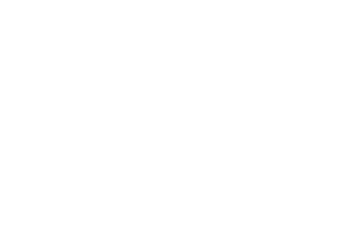

In [2]:
import requests
from bs4 import BeautifulSoup
import jieba
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 爬取科技新報網站
url1 = 'https://technews.tw/'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.text, 'html.parser')
news1 = soup1.select('h1.entry-title > a')[:10]  # 取前10筆新聞

# 爬取科技報橘網站
url2 = 'https://buzzorange.com/techorange/'
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, 'html.parser')
news2 = soup2.select('h4.entry-title > a')[:10]  # 取前10筆新聞

# 合併新聞標題
news = [n.text for n in news1] + [n.text for n in news2]

# 定義科技相關詞彙
tech_words = ['人工智慧', '機器學習', '區塊鏈', '物聯網', '雲端運算', '大數據', '虛擬實境']

# 篩選科技相關詞彙並斷詞
tokens = []
for n in news:
    words = jieba.cut(n)
    for w in words:
        if re.match('.*[\u4e00-\u9fa5]+.*', w) and w in tech_words:
            tokens.append(w)

# 計算詞頻並轉換為稀疏矩陣
df = pd.get_dummies(tokens)
co_occurrence = np.dot(df.T, df)

# 繪製共現性網絡圖
G = nx.Graph()
for i, word1 in enumerate(df.columns):
    for j, word2 in enumerate(df.columns):
        if co_occurrence[i, j] > 0:
            G.add_edge(word1, word2, weight=co_occurrence[i, j])

# 調整節點大小和顏色，以及邊線的粗細和顏色
node_size = [df[word].sum()*10 for word in df.columns]
node_color = [np.random.rand(3,) for i in range(len(df.columns))]
edge_width = [d['weight']*0.2 for (u, v, d) in G.edges(data=True)]
edge_color = [np.random.rand(3,) for i in range(len(G.edges))]

# 繪製圖形
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei', font_weight='bold', alpha=0.8)
plt.axis('off')
plt.show()

#### 繪製圖形

這段程式碼會繪製一個圖形，該圖形呈現科技相關詞彙的共現性分析結果，
其中每個節點表示一個詞彙，節點的大小和顏色代表該詞彙在新聞標題中出現的頻率和其所屬的科技領域，
邊線的粗細和顏色則代表兩個詞彙之間的共現頻率。
該圖形可以幫助我們了解科技相關詞彙之間的關聯性，進而發現一些有趣的趨勢和現象。

網站的 HTML 結構有變化：網站可能在更新後更改了 HTML 結構或者 class 名稱，這樣程式碼就無法正確地解析出新聞標題。

網站有防爬機制：為了防止網站被爬蟲爬取，網站可能會增加一些防爬機制，
例如檢測 HTTP 請求頭信息或者設置 Cookie 驗證機制。
如果你沒有處理這些防爬機制，那麼爬蟲就無法正確地獲取網頁內容。

Python 程式碼中的語法或者庫有錯誤：如果你的程式碼中有語法或者庫的錯誤，那麼程式就無法正確地運行。

如果你遇到了無法運行程式碼的問題，可以嘗試檢查以上三點，並且搜尋相關的解決方案。
此外，建議可以逐步地測試程式碼，從爬取網頁內容開始，逐步確認每一個步驟是否正確，以便找到錯誤的原因和解決方案。

如果你的程式碼沒有出現任何 error，但是仍然無法正常運行，可能有以下原因：

網頁的解析方式有誤：網頁可能是動態生成的，而你使用的是靜態爬蟲，因此無法獲取到完整的網頁內容。
這種情況下，你需要使用動態爬蟲來獲取網頁內容。

程式碼中的邏輯錯誤：即使程式碼沒有出現 error，也有可能存在邏輯錯誤，導致程式無法正確運行。
這種情況下，你需要檢查程式碼中每一個步驟是否正確，以及變數是否正確命名和使用。

網頁的讀取時間過長：有些網頁可能需要較長的時間才能夠完全加載，
如果你的程式碼沒有等待網頁完全加載就開始解析，那麼就無法獲取到完整的網頁內容。
這種情況下，你可以使用 Selenium 等工具來模擬人的操作，等待網頁完全加載後再進行解析。

總之，如果你的程式碼沒有出現任何 error，但是仍然無法正常運行，
那麼你需要逐步檢查程式碼中的每一個步驟，以及可能存在的邏輯錯誤、
網頁解析方式、網頁讀取時間等問題，以便找到錯誤的原因和解決方案。

In [3]:
import requests
from bs4 import BeautifulSoup
import jieba
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
# 爬取科技新報網站
url1 = 'https://technews.tw/'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.text, 'html.parser')
news1 = soup1.select('h1.entry-title > a')[:10]  # 取前10筆新聞
news1

[<a href="https://technews.tw/2023/03/23/facebook-accounts-hijacked-by-new-malicious-chatgpt-chrome-extension/" rel="bookmark" title="ChatGPT 擴充功能夾帶惡意外掛，竊取 Facebook 帳號">ChatGPT 擴充功能夾帶惡意外掛，竊取 Facebook 帳號</a>,
 <a href="https://technews.tw/2023/03/23/deutsche-telekom-review/" rel="bookmark" title="憂與華為過度密切，德政府擬對德國電信進行審查">憂與華為過度密切，德政府擬對德國電信進行審查</a>,
 <a href="https://finance.technews.tw/2023/03/23/gas-electricity/" rel="bookmark" title="全台首座燃氣汽電共生廠商轉！奇美實現 80% 用電自主供給">全台首座燃氣汽電共生廠商轉！奇美實現 80% 用電自主供給</a>,
 <a href="https://technews.tw/2023/03/23/indeed-to-lay-off-2200-employees/" rel="bookmark" title="春江水暖鴨先知？求職網站 Indeed 宣布裁員 2,200人">春江水暖鴨先知？求職網站 Indeed 宣布裁員 2,200人</a>,
 <a href="https://technews.tw/2023/03/23/ios-17/" rel="bookmark" title="iOS 17 何時亮相？">iOS 17 何時亮相？</a>,
 <a href="https://finance.technews.tw/2023/03/23/terminal-interest-rate/" rel="bookmark" title="聯準會終端利率峰值將現！法人：美國百大債後市利好">聯準會終端利率峰值將現！法人：美國百大債後市利好</a>,
 <a href="https://finance.technews.tw/2023/03/23/yellen-tells-senators-b

In [17]:
# 爬取科技報橘網站
url2 = 'https://www.blocktempo.com/category/latest-news/'
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, 'html.parser')
news2 = soup2.select('h3.entry-title > a')[:10]  # 取前10筆新聞
news2

[]

In [6]:
# 合併新聞標題
news = [n.text for n in news1] + [n.text for n in news2]

In [7]:
# 定義科技相關詞彙
tech_words = ['人工智慧', '機器學習', '區塊鏈', '物聯網', '雲端運算', '大數據', '虛擬實境']

In [8]:
# 篩選科技相關詞彙並斷詞
tokens = []
for n in news:
    words = jieba.cut(n)
    for w in words:
        if re.match('.*[\u4e00-\u9fa5]+.*', w) and w in tech_words:
            tokens.append(w)

In [9]:
# 計算詞頻並轉換為稀疏矩陣
df = pd.get_dummies(tokens)
co_occurrence = np.dot(df.T, df)

C:\Users\happy\AppData\Local\Temp\ipykernel_15600\190472866.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.get_dummies(tokens)


In [10]:
# 繪製共現性網絡圖
G = nx.Graph()
for i, word1 in enumerate(df.columns):
    for j, word2 in enumerate(df.columns):
        if co_occurrence[i, j] > 0:
            G.add_edge(word1, word2, weight=co_occurrence[i, j])

In [11]:
# 調整節點大小和顏色，以及邊線的粗細和顏色
node_size = [df[word].sum()*10 for word in df.columns]
node_color = [np.random.rand(3,) for i in range(len(df.columns))]
edge_width = [d['weight']*0.2 for (u, v, d) in G.edges(data=True)]
edge_color = [np.random.rand(3,) for i in range(len(G.edges))]

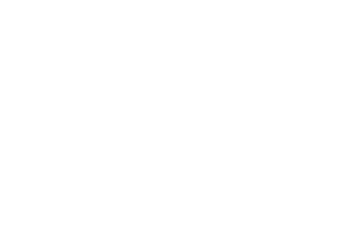

In [12]:
# 繪製圖形
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei', font_weight='bold', alpha=0.8)
plt.axis('off')
plt.show()